In [2]:
import numpy as np
import pandas as pd

In [3]:
encodings =['utf-8','latin1','ISO-8859-1','cp1252']
file_path='spam.csv'
for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"File succesfully read with encoding:{encoding}")
        break
    except UnicodeDecodeError:
        print(f"Faild to read with encoding:{encoding}")
        continue
if 'df' in locals():
    print("CSV file has been succesfully loaded")
else:
    print("All the encoding attempts failed. Unable to read the CSV file")
    

Faild to read with encoding:utf-8
File succesfully read with encoding:latin1
CSV file has been succesfully loaded


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1957,ham,Take something for pain. If it moves however t...,NaN,NaN,NaN
4962,ham,I want to see your pretty pussy...,NaN,NaN,NaN
774,ham,Just sleeping..and surfing,NaN,NaN,NaN
4944,ham,Anyway I don't think I can secure anything up ...,NaN,NaN,NaN
836,spam,Do you want 750 anytime any network mins 150 t...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
2996,ham,Don know..he is watching film in computer..
4948,ham,I am in bus on the way to calicut
4924,ham,Ok... Let u noe when i leave my house.
4224,ham,\The world suffers a lot... Not because of the...
2106,ham,Thank you. I like you as well...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1375,ham,We're finally ready fyi
1501,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
398,ham,"Good evening Sir, Al Salam Wahleykkum.sharing ..."
1675,ham,Painful words- \I thought being Happy was the ...
2523,ham,"Sorry, I'll call later"


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

In [15]:
df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x191319b9490>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

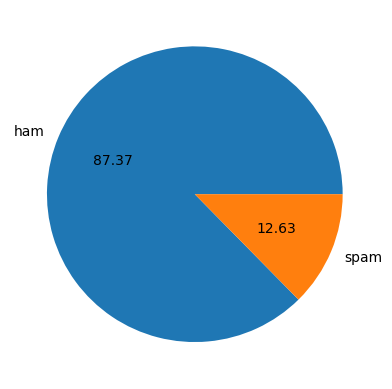

In [17]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [18]:
import nltk

In [19]:
!pip install nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amudh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters']=df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

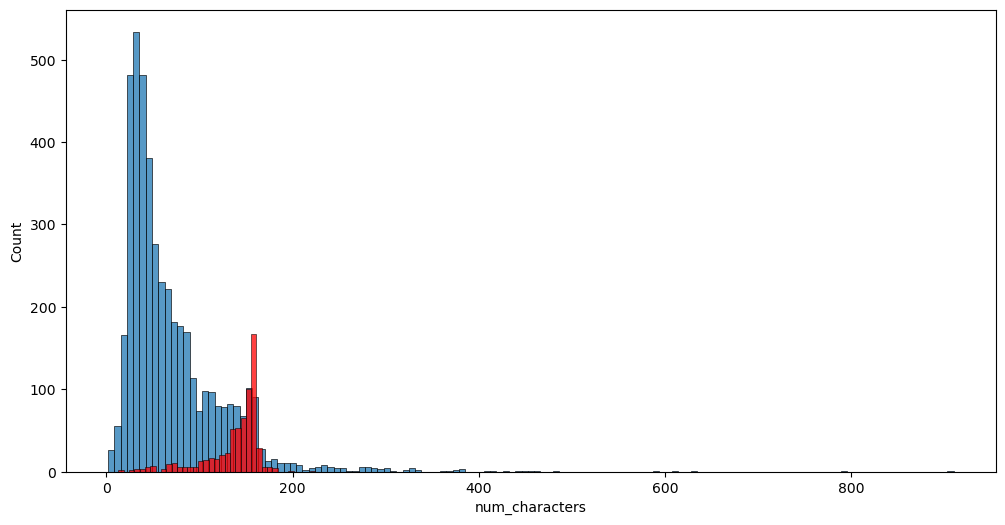

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],
            color='red')


<Axes: xlabel='num_words', ylabel='Count'>

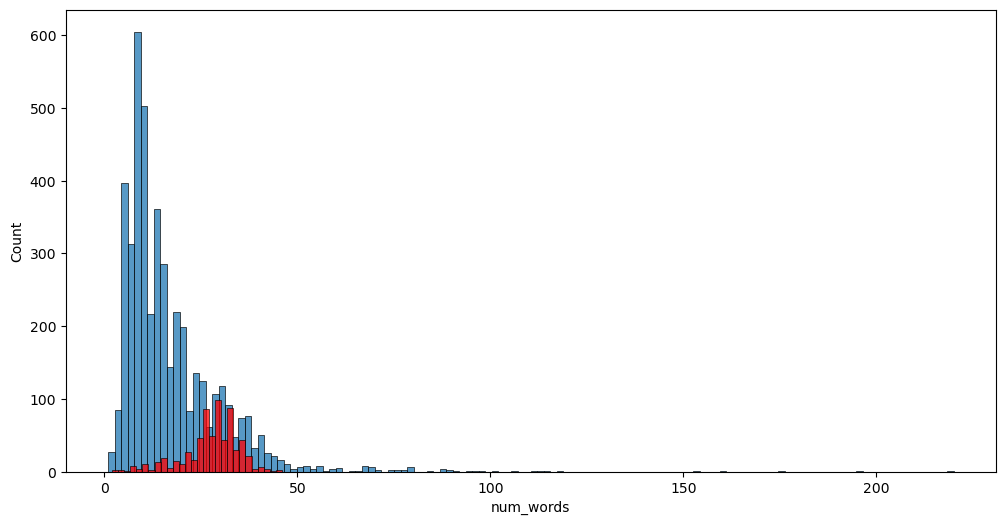

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],
            color='red')


C:\Users\amudh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


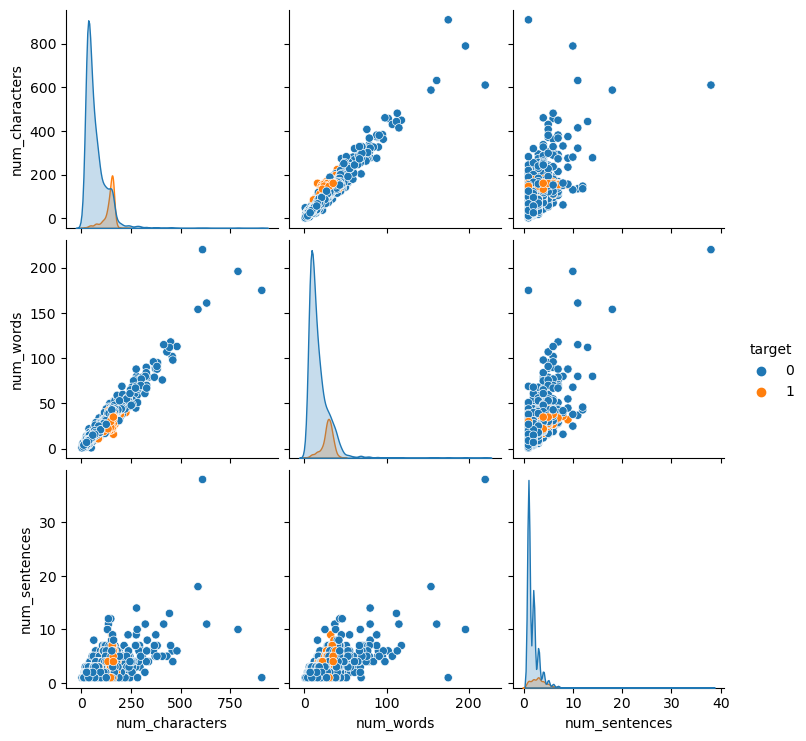

In [31]:
sns.pairplot(df,hue='target')


In [32]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
ps=PorterStemmer()
import string
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
 
transformed_text=transform_text("I miss you, can we talk tonight???? PLease baby!!!!!")
print(transformed_text)
    

miss talk tonight pleas babi


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amudh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [35]:
df['transformed_text']=df['text'].apply(transform_text)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
ham_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))


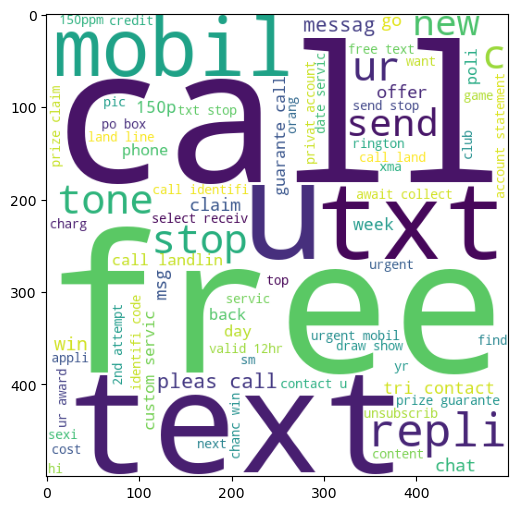

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

9939

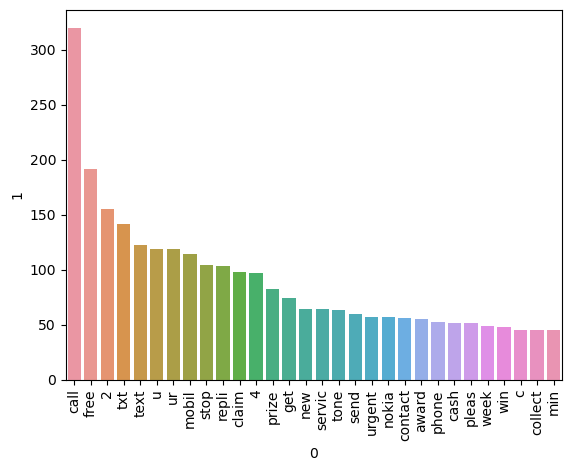

In [43]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [45]:
len(ham_corpus)

35404

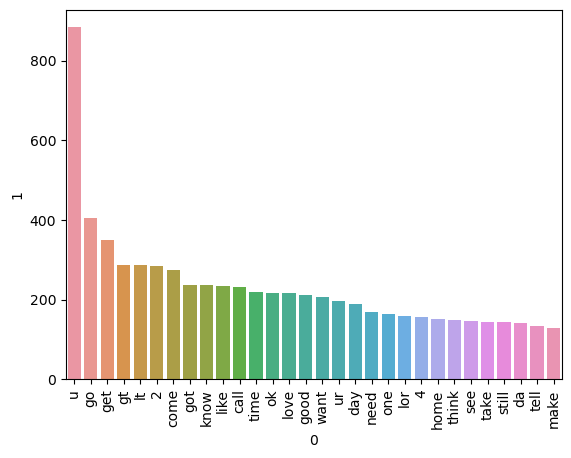

In [46]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [49]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
x.shape

(5169, 3000)

In [51]:
y=df['target'].values

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
mnb=MultinomialNB()

In [56]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print('Acc_score:',accuracy_score(y_test,y_pred))
print('Confusion_matrix:',confusion_matrix(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))





Acc_score: 0.9709864603481625
Confusion_matrix: [[896   0]
 [ 30 108]]
precision_score: 1.0


In [73]:
!pip install xgboost
!pip install pipwin
!pipwin install scikit-learn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for pyprind from https://files.pythonhosted.org/packages/ab/b3/1f12ebc5009c65b607509393ad98240728b4401bc3593868fb161fdd3760/PyPrind-2.11.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for js2py from https://files.pythonhosted.org/packages/88/58/2feb430d47c9f18f331494b429697342722b51f28dad8ad92a511c0f6fc8/Js2Py-0.74-py3-none-any.whl.metadata
  Obtaining dependency information for pySmartDL>=1.3.1 from https://files.pythonhosted.org/packages/ac/6a/582286ea74c54363cba30413214767904f0a239e12253c3817feaf78453f/pySmartDL-1.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for tzlocal>=1.2 from https://files.pythonhosted.org/packages/97/3f/c4c51c55ff8487f2e6d0e618dba917e3c3ee2caae6cf0fbb59c9b1876f2e/tzlocal-5.2-py3-none-any

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\amudh\anaconda3\Scripts\pipwin.exe\__main__.py", line 7, in <module>
  File "C:\Users\amudh\anaconda3\Lib\site-packages\pipwin\command.py", line 84, in main
    cache = pipwin.PipwinCache()
            ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\amudh\anaconda3\Lib\site-packages\pipwin\pipwin.py", line 210, in __init__
    self.data = build_cache()
                ^^^^^^^^^^^^^
  File "C:\Users\amudh\anaconda3\Lib\site-packages\pipwin\pipwin.py", line 103, in build_cache
    dl_function = re.search(r"function dl.*\}", soup.find("script").string).group(0)
                                                ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'string'


In [79]:
!pip install scikit-learn

In [80]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [81]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
xgb=XGBClassifier(m_estimators=50,random_state=2)

In [82]:
clfs={'LR':lrc,'xgb':xgb}

In [83]:
def train_classifier(clfs,x_train,y_train,x_test,y_test):
    clfs.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    prec=precision_score(y_test,y_pred)
    return acc,prec

In [84]:
train_classifier(lrc,x_train,y_train,x_test,y_test)

(0.9584139264990329, 0.9702970297029703)

In [85]:
acc_score=[]
prec_score=[]
for name, clfs in clfs.items():
    curr_acc,curr_prec=train_classifier(clfs,x_train,y_train,x_test,x_test)
    print("For:",name)
    print("Acc:",curr_acc)
    print("Prec:",curr_prec)
    acc_score.append(curr_acc)
    prec_score.append(curr_prec)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [66]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Acc':accuracy_score,'Prec':precision_score}).sort_values('Prec',ascending=False)

AttributeError: 'LogisticRegression' object has no attribute 'keys'

In [67]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accu_max_ft':accuracy_scores})

AttributeError: 'LogisticRegression' object has no attribute 'keys'

In [86]:
mnb=MultinomialNB()

In [88]:
from sklearn.ensemble import VotingClassifier

In [92]:
vote=VotingClassifier(estimators=[('nb',mnb)],voting='soft')

In [94]:
vote.fit(x_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB())], voting='soft')

In [95]:
y_pred=vote.predict(x_test)
print('Acc:',accuracy_score(y_test,y_pred))
print('Prec:',precision_score(y_test,y_pred))


Acc: 0.9709864603481625
Prec: 1.0


In [96]:
estimator=[('nb',mnb)]
final_estimator=RandomForestClassifier()

<IPython.core.display.Javascript object>

In [97]:
from sklearn.ensemble import StackingClassifier

In [99]:
clf=StackingClassifier(estimators=estimator,final_estimator=final_estimator)

In [100]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [102]:
print('Acc:',accuracy_score(y_test,y_pred))
print('Prec:',precision_score(y_test,y_pred))


Acc: 0.9555125725338491
Prec: 0.8108108108108109


In [112]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


In [119]:
x_train=['sample_text 1','sample_text 2','sample text 3']
y_train=[0,1,0]
tfidf=TfidfVectorizer(lowercase=True,stop_words='english')
x_train_tfidf=tfidf.fit_transform(x_train)
mnb=MultinomialNB()
mnb.fit(x_train_tfidf,y_train)
with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)
with open('model.pkl','wb') as model_file:
    pickle.dump(mnb,model_file)
    